In [41]:
#импортируем необходимые для дальнейшей работы библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport

### Читаем данные

In [42]:
df = pd.read_csv('adult-238429-882125.csv')

In [43]:
#выведем заголовок таблицы и первые 5 строк
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [44]:
#посмотрим, что еще есть и сколько строк
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [45]:
#какие есть колонки? Видим, что все колонки отображаются
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

Видим, что файл состоит из различных персональных данных, полученных в ходе переписи населения в США в 1994 году. Изучив информацию о датасете из сети, получаем, что одной из целей формирования датасета было создание ML модели для предсказания достижения дохода более 50000. Можем считать тип данных колонки income логическим: "доход меньше или равен 50к" - False, "доход более 50к" - True, а также считать колонку income целевой.
В данном анализе я не задействовал параметр fnlwgt ("Итоговый вес"), являющийся внутренним параметром Бюро переписи населения США и строящимся из совокупности других параметров.

In [46]:
#изначально не ясно, есть ли у колонки capital.gain отличные от 0 значения, с которыми можно работать дальше. 
df['capital.gain'].describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital.gain, dtype: float64

In [47]:
#Видим, что есть:
df.loc[df['capital.gain'] >0] 

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1519,54,Self-emp-inc,166459,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
1520,52,Private,152234,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,40,Japan,>50K
1521,53,Self-emp-inc,263925,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,>50K
1522,52,Private,118025,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K
1523,46,Private,370119,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,20,Private,59948,9th,5,Never-married,Adm-clerical,Unmarried,Black,Female,114,0,20,United-States,<=50K
4227,39,Private,151023,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,114,0,45,United-States,<=50K
4228,33,Private,175412,9th,5,Divorced,Craft-repair,Unmarried,White,Male,114,0,55,United-States,<=50K
4229,38,Private,254439,10th,6,Widowed,Transport-moving,Unmarried,Black,Male,114,0,40,United-States,<=50K


### Пропуски

Проверка на пустые значения:

In [48]:
#Ищем Nan
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

При первом взгляде на данные, можно заметить, что неизвествные данные обозначены знаком вопроса.
Проверка на "?"

In [49]:
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [ ]:
Не будем как-то заполнять пропуски этих данных, поэтому избавимся от строк с ними

In [50]:
~df['workclass'].isin(['?'])

0        False
1         True
2        False
3         True
4         True
         ...  
32556     True
32557     True
32558     True
32559     True
32560     True
Name: workclass, Length: 32561, dtype: bool

In [51]:
df = df[~df['workclass'].isin(['?'])].copy()

In [52]:
df.isin(['?']).sum()

age                 0
workclass           0
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    556
income              0
dtype: int64

In [53]:
df = df[~df['native.country'].isin(['?'])].copy()

In [54]:
df = df[~df['occupation'].isin(['?'])].copy()

In [55]:
df.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [123]:
#проверка работоспособности
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_rate
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0


### Переменные

Используя ProfileReport, посмортим, какие переменные есть в датасете

In [57]:
profile = ProfileReport(df, title="Pandas Profiling Report", minimal = True)

In [58]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [59]:
profile

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Категориальные номинальные переменные

In [60]:
df['workclass'].value_counts(normalize=True)

Private             0.738877
Self-emp-not-inc    0.082853
Local-gov           0.068530
State-gov           0.042404
Self-emp-inc        0.035608
Federal-gov         0.031265
Without-pay         0.000464
Name: workclass, dtype: float64

In [61]:
df['marital.status'].value_counts(normalize=True)

Married-civ-spouse       0.466315
Never-married            0.322459
Divorced                 0.139712
Separated                0.031132
Widowed                  0.027419
Married-spouse-absent    0.012267
Married-AF-spouse        0.000696
Name: marital.status, dtype: float64

In [62]:
df['occupation'].value_counts(normalize=True)

Prof-specialty       0.133877
Craft-repair         0.133612
Exec-managerial      0.132352
Adm-clerical         0.123367
Sales                0.118825
Other-service        0.106492
Machine-op-inspct    0.065181
Transport-moving     0.052119
Handlers-cleaners    0.044758
Farming-fishing      0.032790
Tech-support         0.030237
Protective-serv      0.021351
Priv-house-serv      0.004741
Armed-Forces         0.000298
Name: occupation, dtype: float64

In [63]:
df['relationship'].value_counts(normalize=True)

Husband           0.413202
Not-in-family     0.256150
Own-child         0.148067
Unmarried         0.106492
Wife              0.046615
Other-relative    0.029474
Name: relationship, dtype: float64

In [64]:
df['race'].value_counts(normalize=True)

White                 0.859790
Black                 0.093396
Asian-Pac-Islander    0.029673
Amer-Indian-Eskimo    0.009482
Other                 0.007659
Name: race, dtype: float64

In [65]:
df['sex'].value_counts(normalize=True)

Male      0.675685
Female    0.324315
Name: sex, dtype: float64

In [66]:
df['native.country'].value_counts(normalize=True)

United-States                 0.911876
Mexico                        0.020224
Philippines                   0.006233
Germany                       0.004244
Puerto-Rico                   0.003614
Canada                        0.003548
El-Salvador                   0.003315
India                         0.003315
Cuba                          0.003050
England                       0.002851
Jamaica                       0.002652
South                         0.002354
Italy                         0.002254
China                         0.002254
Dominican-Republic            0.002221
Vietnam                       0.002122
Guatemala                     0.002089
Japan                         0.001956
Poland                        0.001857
Columbia                      0.001857
Iran                          0.001392
Taiwan                        0.001392
Haiti                         0.001392
Portugal                      0.001127
Nicaragua                     0.001094
Peru                     

#### Категориальные порядковые переменные

In [67]:
df['education'].value_counts(normalize=True)

HS-grad         0.326238
Some-college    0.221404
Bachelors       0.167230
Masters         0.053942
Assoc-voc       0.043333
11th            0.034746
Assoc-acdm      0.033420
10th            0.027187
7th-8th         0.018467
Prof-school     0.017970
9th             0.015085
12th            0.012499
Doctorate       0.012433
5th-6th         0.009548
1st-4th         0.005006
Preschool       0.001492
Name: education, dtype: float64

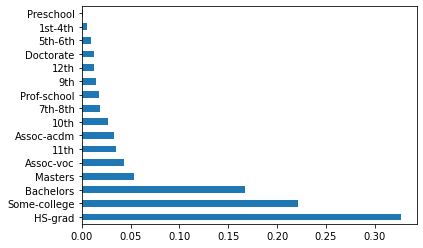

In [68]:
df['education'].value_counts(normalize=True).plot.barh()
plt.show()

In [69]:
df['income'].value_counts(normalize=True)

<=50K    0.751078
>50K     0.248922
Name: income, dtype: float64

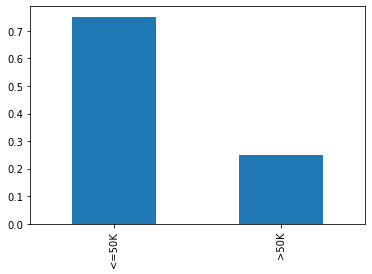

In [70]:
df['income'].value_counts(normalize=True).plot.bar()
plt.show()

Видим, что большая часть людей из датасета еще не превысила 50000 дохода

#### Числовые данные (дискретные)

In [71]:
df['age'].value_counts(normalize=True)

36    0.028247
31    0.028214
33    0.027750
34    0.027717
37    0.027452
        ...   
82    0.000232
83    0.000166
88    0.000099
85    0.000099
86    0.000033
Name: age, Length: 72, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Percent'>

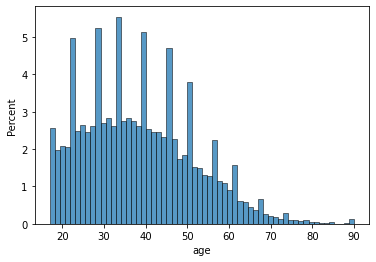

In [72]:
sns.histplot(df['age'], stat='percent')

In [73]:
#the number of years of education
df['education.num'].value_counts(normalize=True)

9     0.326238
10    0.221404
13    0.167230
14    0.053942
11    0.043333
7     0.034746
12    0.033420
6     0.027187
4     0.018467
15    0.017970
5     0.015085
8     0.012499
16    0.012433
3     0.009548
2     0.005006
1     0.001492
Name: education.num, dtype: float64

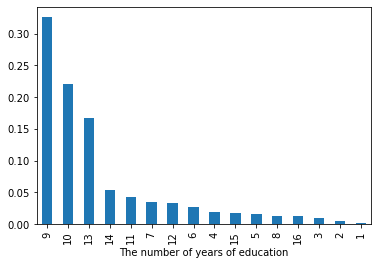

In [74]:
p = df['education.num'].value_counts(normalize=True).plot.bar()
p.set_xlabel("The number of years of education")
plt.show()

In [75]:
df['capital.gain'].value_counts(normalize=True)

0        0.915854
15024    0.011173
7688     0.008952
7298     0.007957
99999    0.004907
           ...   
7978     0.000033
5060     0.000033
2538     0.000033
401      0.000033
22040    0.000033
Name: capital.gain, Length: 118, dtype: float64

<AxesSubplot:xlabel='capital.gain', ylabel='Percent'>

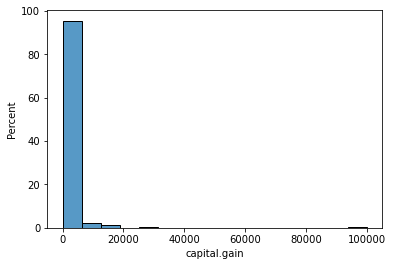

In [76]:
sns.histplot(df['capital.gain'], stat='percent')

In [77]:
df['capital.loss'].value_counts(normalize=True)

0       0.952689
1902    0.006432
1977    0.005371
1887    0.005139
1848    0.001658
          ...   
2201    0.000033
1944    0.000033
1411    0.000033
3004    0.000033
4356    0.000033
Name: capital.loss, Length: 90, dtype: float64

<AxesSubplot:xlabel='capital.loss', ylabel='Percent'>

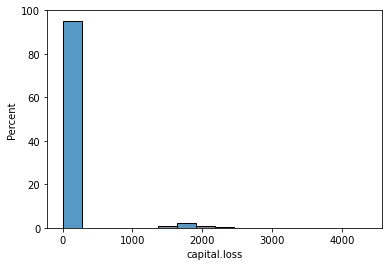

In [78]:
sns.histplot(df['capital.loss'], stat='percent')

Большая часть опрошенных людей, данные которых попали в в выборку даатасета, указали нулевые значения годовых доходов и расходов

In [79]:
df['hours.per.week'].value_counts(normalize=True)

40    0.472482
50    0.090113
45    0.058119
60    0.046582
35    0.039255
        ...   
94    0.000033
82    0.000033
92    0.000033
87    0.000033
74    0.000033
Name: hours.per.week, Length: 94, dtype: float64

<AxesSubplot:xlabel='hours.per.week', ylabel='Density'>

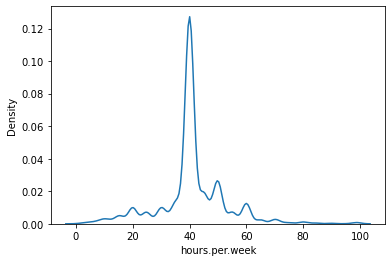

In [80]:
sns.kdeplot(df['hours.per.week'])

В основном опрошенные работают стандартные 40 часов в неделю

### Взаимосвязь переменных

#### Число-Число

<AxesSubplot:xlabel='capital.gain', ylabel='hours.per.week'>

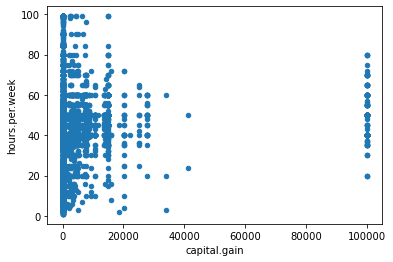

In [89]:
df.plot.scatter(x='capital.gain', y='hours.per.week')

<AxesSubplot:xlabel='capital.loss', ylabel='hours.per.week'>

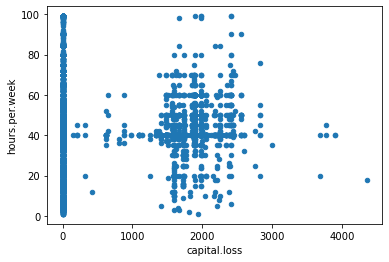

In [90]:
df.plot.scatter(x='capital.loss', y='hours.per.week')

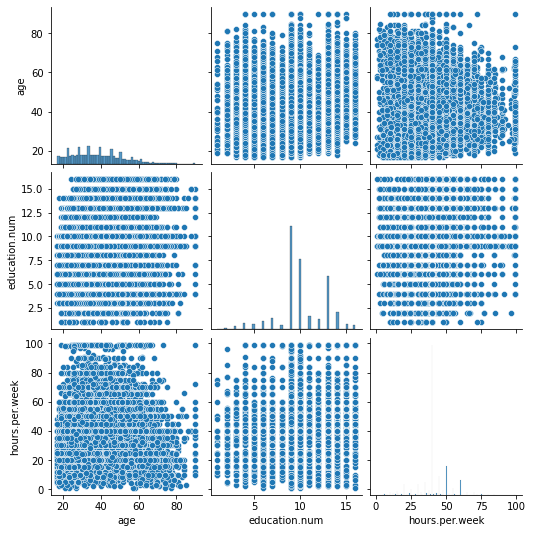

In [95]:
sns.pairplot(data = df, vars=['age', 'education.num', 'hours.per.week'])

#### Число-Категория

Здесь содержатся более интересные относительно целевого параметра зависимости 

In [128]:
#сравним относительно возраста людей с разным доходом
df.groupby('income')['age'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
<=50K,22654.0,36.61,13.46,17.0,26.0,34.0,45.0,90.0
>50K,7508.0,43.96,10.27,19.0,36.0,43.0,51.0,90.0


C:\Users\fedor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='age'>

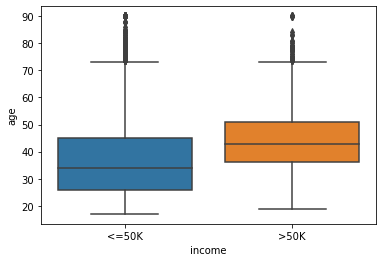

In [130]:
sns.boxplot(df['income'], df['age'])

Видим, что люди с доходом больше 500000 в среднем старше тех, у кого доход ниже или равен

In [101]:
df.groupby('income')['hours.per.week'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
<=50K,22654.0,39.35,11.95,1.0,38.0,40.0,40.0,99.0
>50K,7508.0,45.71,10.74,1.0,40.0,40.0,50.0,99.0


C:\Users\fedor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='hours.per.week'>

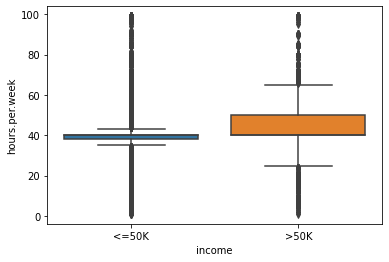

In [131]:
sns.boxplot(df['income'], df['hours.per.week'])

Люди с доходом больше 50000 в среднем работают те же 40ч в день, что и люди с меньшим доходом, но в целом они работают больше часов в день

In [103]:
df.groupby('income')['education.num'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
<=50K,22654.0,9.63,2.41,1.0,9.0,9.0,10.0,16.0
>50K,7508.0,11.61,2.37,2.0,10.0,12.0,13.0,16.0


C:\Users\fedor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='education.num'>

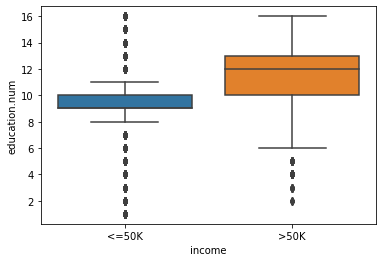

In [132]:
sns.boxplot(df['income'], df['education.num'])

Люди с доходом больше 50000 имеют более высокий уровень образования

#### Категория-Категория

Переведем целевой параметр income к более логическому виду, создав переменную income_rate, где 0 - доход менее 50000, 1 - доход более 50000

In [112]:
df['income_rate'] = df['income'].map({'<=50K':0, '>50K':1})

<AxesSubplot:xlabel='workclass'>

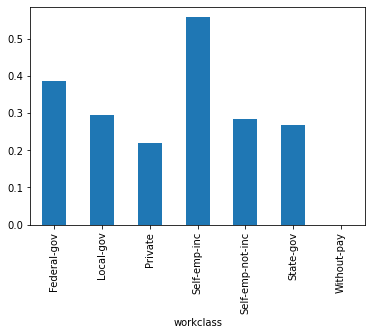

In [114]:
df.groupby('workclass')['income_rate'].mean().plot.bar()

По типам деятельности наибольшие доходы среди опрошенных имеют зарегистрированные самозанятые и чиновники федерального правительства

<AxesSubplot:xlabel='occupation'>

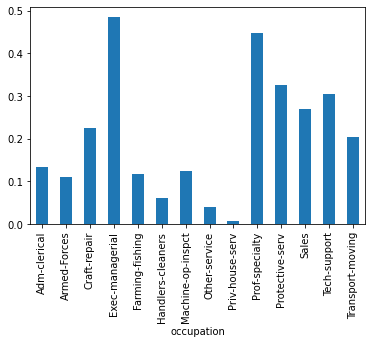

In [118]:
df.groupby('occupation')['income_rate'].mean().plot.bar()

По роду занятий наибольшие доходы среди опрошенных имеют исполнительные директоры и Prof-specialty 

<AxesSubplot:xlabel='education'>

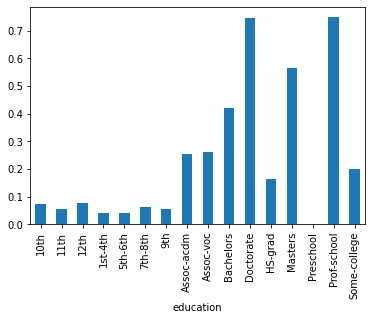

In [124]:
df.groupby('education')['income_rate'].mean().plot.bar()

Более образованные люди имеют больший доход, наибольший доход среди опрошенных имеют люди с уровнем образования Doctorate и Prof-school.

### Многомерный анализ

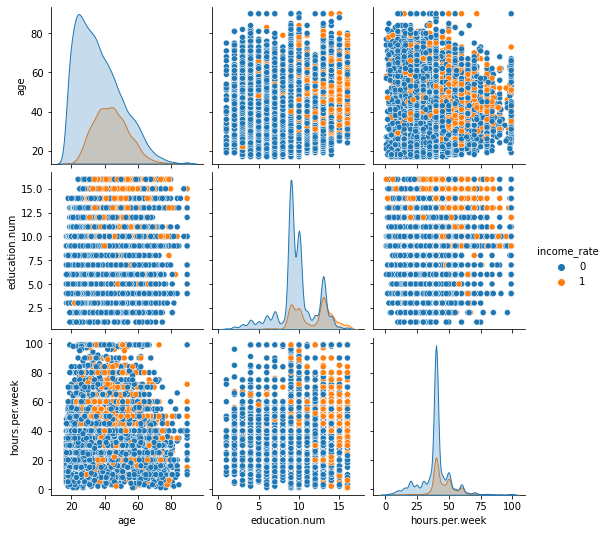

In [122]:
sns.pairplot(data = df, vars=['age', 'education.num', 'hours.per.week'], hue='income_rate')